# 3.3 Analiza napovedanih aktivnih struktur

In [1]:
%run __A_knjiznice.py

# Import specific elements from the script
from __A_knjiznice import *
from __B_funkcije import *
import __C_konstante as kon

/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1
/Users/samonose/PycharmProjects/IDO_inhibitors_ML_predictions/dir1


In [2]:
best_molecules = pd.read_csv(f'{kon.path_files}/podatki_napoved/most_active_filtered.csv')
molecules = best_molecules[['Smiles', 'Predicted_Activity', 'Probability_Active']]
molecules

,Smiles,Predicted_Activity,Probability_Active
0,C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c...,1,1.00
1,C[C@H]([C@H]1CC[C@H](CC1)c1ccnc2ccc(F)cc12)C(=...,1,0.99
2,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O,1,0.99
3,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N\O,1,0.99
4,C[C@H]([C@H]1CC[C@@H](CC1)c1ccnc2ccc(F)cc12)C(...,1,0.99
...,...,...,...
941,CCCNC(=O)C1CCN(CC1)c1ccc(SCC(=O)Nc2ccc(F)cc2)nn1,1,0.76
942,CC1CCN(CC1)c1ccc2nnc(CCC(=O)Nc3ccc(F)cc3)n2n1,1,0.76
943,Fc1ccc(cc1)S(=O)(=O)N1CCCc2cc(NC(=O)c3ccc(Cl)c...,1,0.76
944,Cc1ccc(Oc2nccnc2N2CCCC(C2)C(=O)Nc2ccc(F)cc2)cc1,1,0.76


In [4]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

molecules_analysis = molecules.copy()

# Define the function to calculate specific property
def calc_property(smiles, param):
    mol = Chem.MolFromSmiles(smiles)
    if mol:  # Check if molecule was successfully created
        if param == 'Molekulska_masa':
            return Descriptors.MolWt(mol)  # Molecular Weight
        elif param == 'logP':
            return Descriptors.MolLogP(mol)  # LogP
        elif param == 'Število_O_atomov':
            return sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == 'O')  # Oxygen count
        elif param == 'Število_N_atomov':
            return sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == 'N')  # Nitrogen count
        elif param == 'Akceptorji_H_vezi':
            return rdMolDescriptors.CalcNumHBA(mol)  # Hydrogen Bond Acceptors
        elif param == 'Donorji_H_vezi':
            return rdMolDescriptors.CalcNumHBD(mol)  # Hydrogen Bond Donors
        elif param == 'Število_aromatskih_obročev':
            return rdMolDescriptors.CalcNumAromaticRings(mol)  # Aromatic Rings
        elif param == 'TPSA':
            return rdMolDescriptors.CalcTPSA(mol)  # Topological Polar Surface Area
        elif param == 'Število_rotirajočih_vezi':
            return Descriptors.NumRotatableBonds(mol)  # Number of Rotatable 
        else:
            return None  # Return None for unsupported params
    else:
        return None  # Return None if the molecule is invalid

# Example: Assuming 'molecules' is your DataFrame with 'smiles' column
# molecules = pd.read_csv('your_file.csv')  # If you're loading the data

# List of properties to calculate and add to DataFrame
properties = ['Molekulska_masa', 'logP', 'Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi','Število_aromatskih_obročev','TPSA','Število_rotirajočih_vezi']

# Apply the function to each property and add the result as a new column
for prop in properties:
    molecules_analysis[prop] = molecules_analysis['Smiles'].apply(lambda x: calc_property(x, prop))

molecules_analysis

,Smiles,Predicted_Activity,Probability_Active,Molekulska_masa,logP,Število_O_atomov,Število_N_atomov,Akceptorji_H_vezi,Donorji_H_vezi,Število_aromatskih_obročev,TPSA,Število_rotirajočih_vezi
0,C[C@@H](NC(=O)c1ccc(Cl)cc1)[C@H]1CC[C@H](CC1)c...,1,1.00,410.920,6.11960,1,2,2,1,3,41.99,4
1,C[C@H]([C@H]1CC[C@H](CC1)c1ccnc2ccc(F)cc12)C(=...,1,0.99,410.920,6.57590,1,2,2,1,3,41.99,4
2,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N/O,1,0.99,438.239,0.42410,4,7,8,5,2,167.76,7
3,NS(=O)(=O)NCCNc1nonc1\C(Nc1ccc(F)c(Br)c1)=N\O,1,0.99,438.239,0.42410,4,7,8,5,2,167.76,7
4,C[C@H]([C@H]1CC[C@@H](CC1)c1ccnc2ccc(F)cc12)C(...,1,0.99,410.920,6.57590,1,2,2,1,3,41.99,4
...,...,...,...,...,...,...,...,...,...,...,...,...
941,CCCNC(=O)C1CCN(CC1)c1ccc(SCC(=O)Nc2ccc(F)cc2)nn1,1,0.76,431.537,3.08910,2,5,6,2,2,87.22,8
942,CC1CCN(CC1)c1ccc2nnc(CCC(=O)Nc3ccc(F)cc3)n2n1,1,0.76,382.443,3.07100,1,6,6,1,3,75.42,5
943,Fc1ccc(cc1)S(=O)(=O)N1CCCc2cc(NC(=O)c3ccc(Cl)c...,1,0.76,444.915,4.87290,3,2,3,1,3,66.48,4
944,Cc1ccc(Oc2nccnc2N2CCCC(C2)C(=O)Nc2ccc(F)cc2)cc1,1,0.76,406.461,4.57152,2,4,5,1,3,67.35,5


In [7]:
MW_stats = molecules_analysis['Molekulska_masa'].describe()
logP_stats = molecules_analysis['logP'].describe()
Aromatic_Rings_stats = molecules_analysis['Število_aromatskih_obročev'].describe()
HBA_stats = molecules_analysis['Akceptorji_H_vezi'].describe()
HBD_stats = molecules_analysis['Donorji_H_vezi'].describe()
O_Count_stats = molecules_analysis['Število_O_atomov'].describe()
N_Count_stats = molecules_analysis['Število_N_atomov'].describe()

# Create a DataFrame to hold the statistics
stats_df = pd.DataFrame({
    'Molekulska_masa': MW_stats,
    'logP': logP_stats,
    'Število_aromatskih_obročev': Aromatic_Rings_stats,
    'Akceptorji_H_vezi': HBA_stats,
    'Donorji_H_vezi': HBD_stats,
    'Število_O_atomov': O_Count_stats,
    'Število_N_atomov': N_Count_stats,
})

# Transpose the DataFrame to have the statistics as rows
stats_df = stats_df.transpose()
stats_df

,count,mean,std,min,25%,50%,75%,max
Molekulska_masa,946.0,381.169515,67.858221,193.2210,338.38825,384.6605,424.920500,632.66400
logP,946.0,3.559782,1.245727,-0.2871,2.77934,3.6135,4.482475,7.17432
Število_aromatskih_obročev,946.0,2.209302,0.763283,1.0000,2.00000,2.0000,3.000000,5.00000
Akceptorji_H_vezi,946.0,3.550740,1.446786,1.0000,2.00000,3.0000,4.000000,11.00000
Donorji_H_vezi,946.0,1.449260,0.709769,0.0000,1.00000,1.0000,2.000000,5.00000
Število_O_atomov,946.0,2.256871,1.008210,0.0000,2.00000,2.0000,3.000000,9.00000
Število_N_atomov,946.0,3.073996,1.252646,1.0000,2.00000,3.0000,4.000000,10.00000


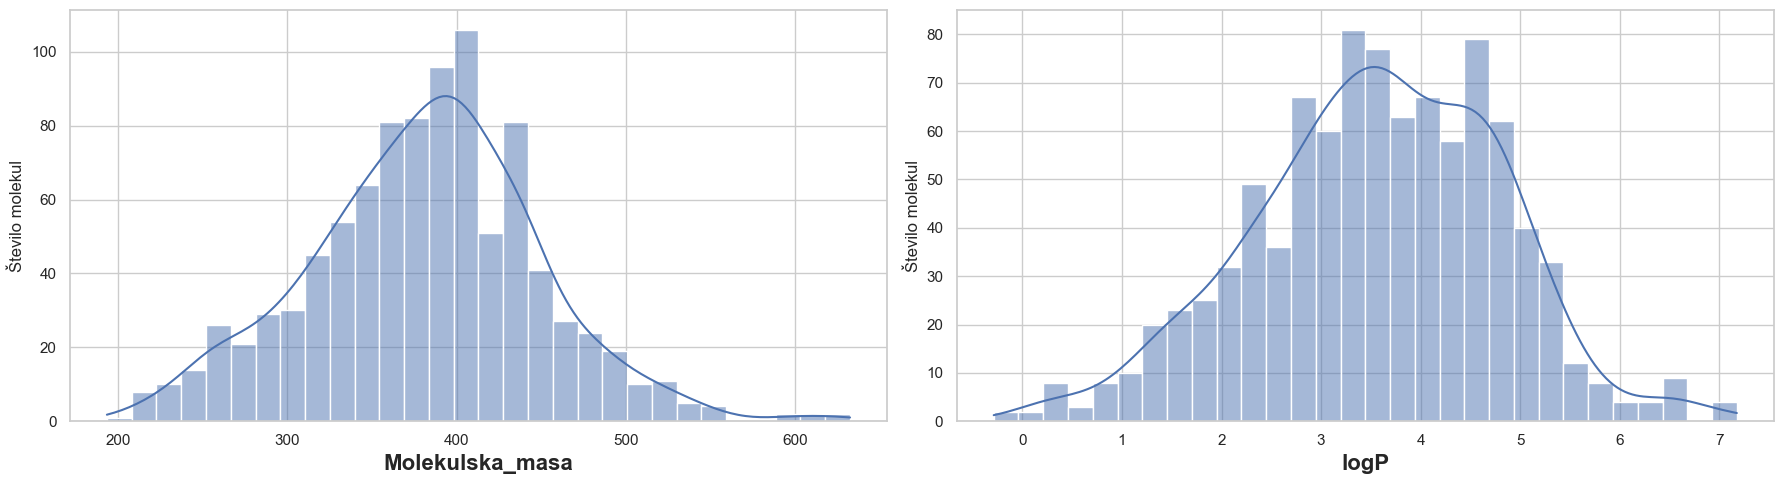

In [10]:
continuous_properties = ['Molekulska_masa', 'logP']

# properties = ['Molekulska_masa', 'logP', 'Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi','Število_aromatskih_obročev','TPSA','Število_rotirajočih_vezi']
# List of discrete properties to visualize
discrete_properties = ['Število_O_atomov', 'Število_N_atomov', 'Akceptorji_H_vezi', 'Donorji_H_vezi', 'Število_aromatskih_obročev', 'Število_rotirajočih_vezi']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure with subplots for continuous properties
fig, axes = plt.subplots(nrows=1, ncols=len(continuous_properties), figsize=(18, 5))

# Loop through each continuous property and create a histogram
for i, prop in enumerate(continuous_properties):
    sns.histplot(molecules_analysis[prop].dropna(), bins=30, kde=True, ax=axes[i])
    # axes[i].set_title(f'{prop}')
    axes[i].set_xlabel(prop,fontsize=16, fontweight='bold')
    axes[i].set_ylabel('Število molekul')

# Adjust layout for continuous properties
plt.tight_layout()
plt.show()

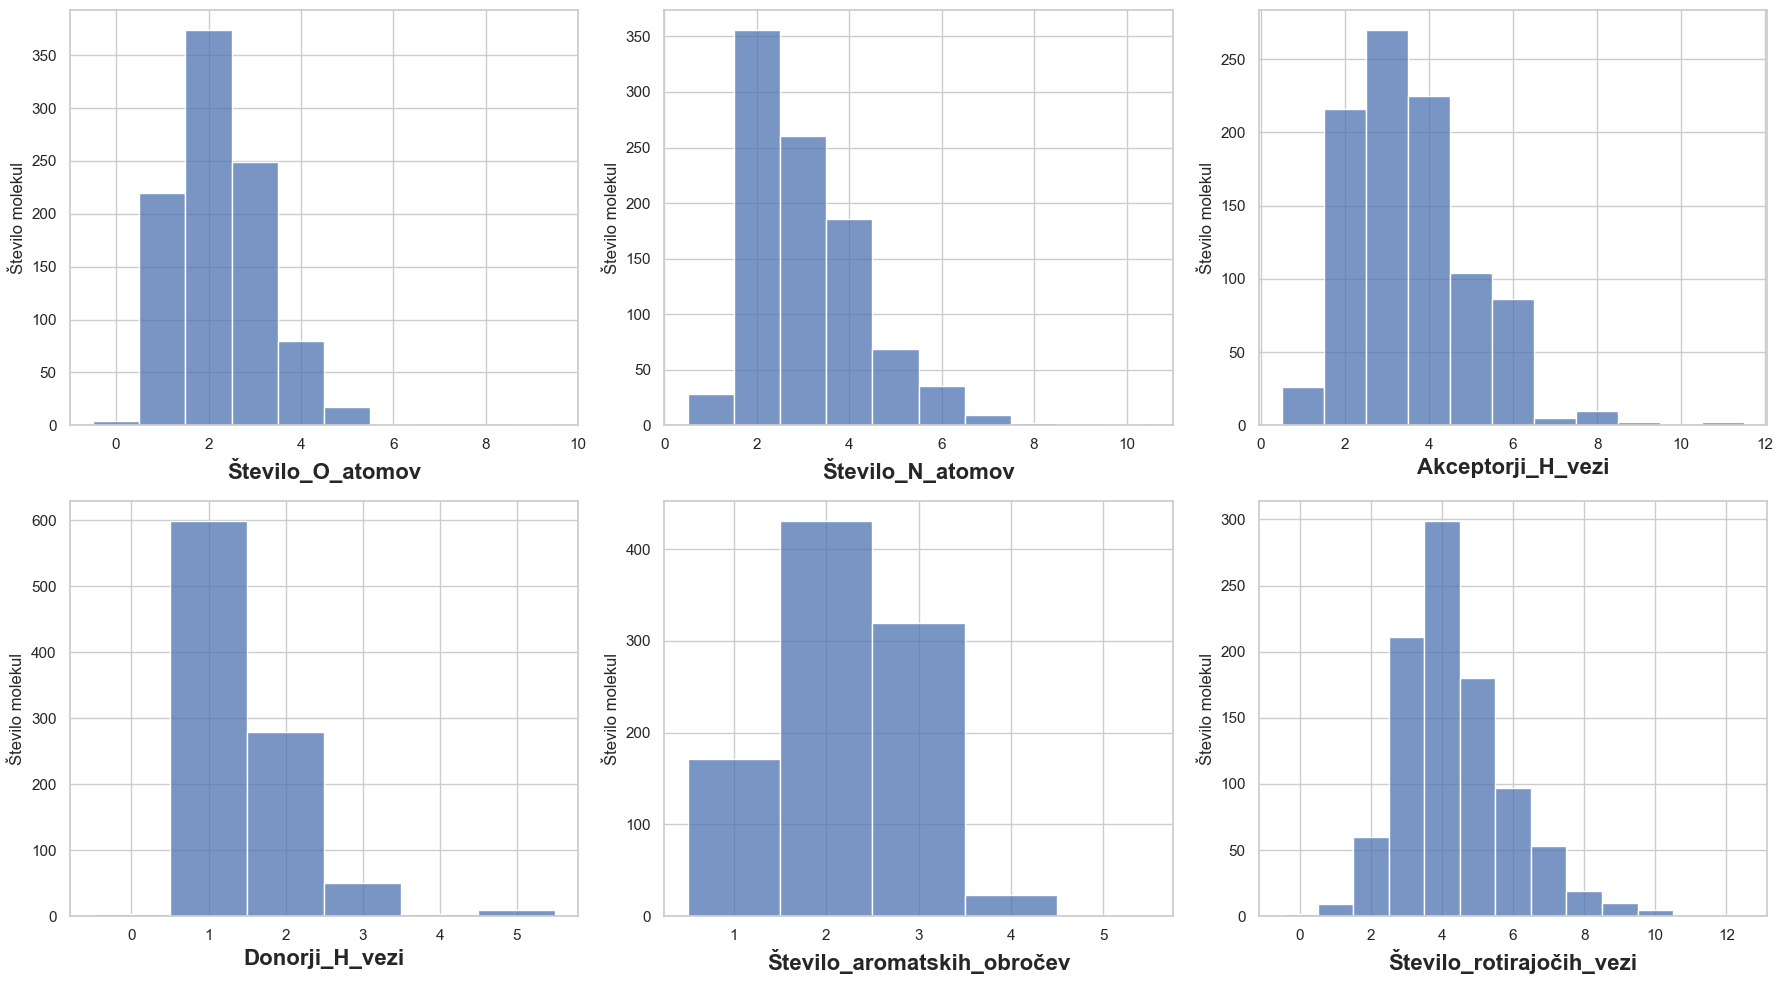

In [11]:
# Create a figure with subplots for discrete properties
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each discrete property and create a histogram
for i, prop in enumerate(discrete_properties):
    sns.histplot(molecules_analysis[prop].dropna(), bins=molecules_analysis[prop].nunique(), discrete=True, ax=axes[i])
    # axes[i].set_title(f'Razporeditev {prop}')
    axes[i].set_xlabel(prop,fontsize=16, fontweight='bold')
    axes[i].set_ylabel('Število molekul')

# Remove any empty subplots if there are less than 6 properties
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for discrete properties
plt.tight_layout()
plt.show()